In [ ]:
import matplotlib
matplotlib.use('Agg')
from sklearn.model_selection import train_test_split
import pandas as pd
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
import matplotlib.pyplot as plt

In [3]:
data=pd.read_csv("diabetes.csv")

df=pd.DataFrame(data)

df=df.drop(['Pregnancies'],axis=1)

print(df)

     Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0        148             72             35        0  33.6   
1         85             66             29        0  26.6   
2        183             64              0        0  23.3   
3         89             66             23       94  28.1   
4        137             40             35      168  43.1   
..       ...            ...            ...      ...   ...   
763      101             76             48      180  32.9   
764      122             70             27        0  36.8   
765      121             72             23      112  26.2   
766      126             60              0        0  30.1   
767       93             70             31        0  30.4   

     DiabetesPedigreeFunction  Age  Outcome  
0                       0.627   50        1  
1                       0.351   31        0  
2                       0.672   32        1  
3                       0.167   21        0  
4                       2.288   33   

In [4]:
df=pd.DataFrame(data)

features=['Glucose','BloodPressure','SkinThickness','Insulin','BMI','DiabetesPedigreeFunction','Age']

X=df[features]
y=df['Outcome']

dtree=DecisionTreeClassifier()
dtree=dtree.fit(X,y)

tree.plot_tree(dtree,feature_names=features)

#Two lines to make our compiler able to draw
plt.savefig('diabetesDecisiontrees.png')
plt.show()

C:\Users\minen\AppData\Local\Temp\ipykernel_20476\588162760.py:15: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  plt.show()


In [5]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

In [6]:
model=DecisionTreeClassifier()
model.fit(X_train,y_train)

,criterion,'gini'
,splitter,'best'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,None
,random_state,None
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,class_weight,None


In [7]:
# 'Glucose','BloodPressure','SkinThickness','Insulin','BMI','DiabetesPedigreeFunction','Age'

Outcome=model.predict([[120,80,45,30,44.7,10,67]])
print(Outcome)

[1]


d:\TechAxis\week56\venv\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


In [10]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score, classification_report

X=df.drop('Outcome',axis=1)

y=df['Outcome']

X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

#4. Train the logistic regression model
#we add a solver and increase max_iter to ensure converge

model=LogisticRegression(solver='liblinear',max_iter=1000)
model.fit(X_train,y_train)
print("Model Training complete")

#5. Evaluate the model
y_pred=model.predict(X_test)

#Accuracy
acc=accuracy_score(y_test,y_pred)
print(f"\nAccuracy: {acc:.2f}")

#Detailed classification report 
print("\nClassification Report: ")
print(classification_report(y_test,y_pred))


Model Training complete

Accuracy: 0.76

Classification Report: 
              precision    recall  f1-score   support

           0       0.80      0.84      0.82        99
           1       0.68      0.62      0.65        55

    accuracy                           0.76       154
   macro avg       0.74      0.73      0.73       154
weighted avg       0.76      0.76      0.76       154



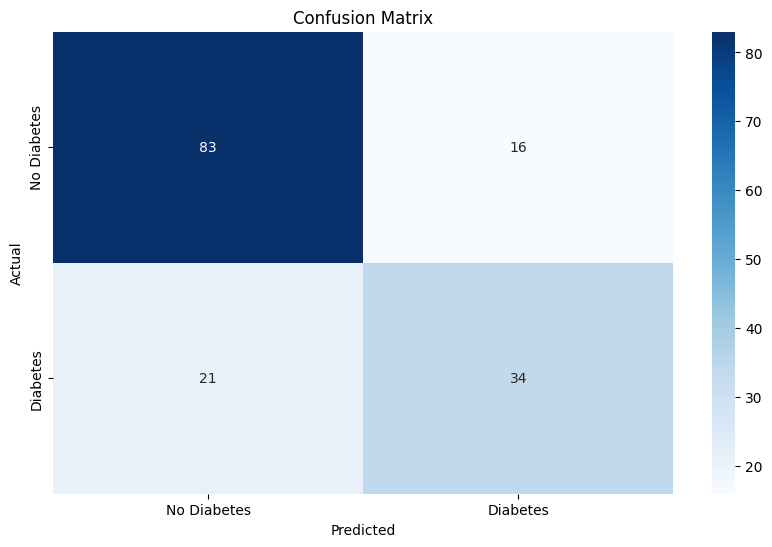

In [20]:
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Assuming y_test and y_pred are already defined
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(10,6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
            xticklabels=['No Diabetes', 'Diabetes'], 
            yticklabels=['No Diabetes', 'Diabetes'])

plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()
